In [1]:
%run ../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Validation set annotations

In [2]:
# from source.datasets.scannet.preprocessing.annotations import create_prefix_pairs

# root_path = "/mnt/sda/datasets/ScanNet"

# create_prefix_pairs(root_path, 'val', 9)

In [3]:
# from source.datasets.base.utils import from_pairs_annotations_csv

# from_pairs_annotations_csv(root_path, 'val_pairs.csv', 'val.csv')

## Test set annotations

In [4]:
# from source.datasets.scannet.preprocessing.annotations import create_prefix_pairs

# root_path = "/mnt/sda/datasets/ScanNet"

# create_prefix_pairs(root_path, 'test', 74)

In [5]:
# from source.datasets.base.utils import from_pairs_annotations_csv

# from_pairs_annotations_csv(root_path, 'test_pairs.csv', 'test.csv')

## Pairs

In [6]:
from omegaconf import OmegaConf

from source.datasets.base.transforms import ImageDepthCalibFeaturesTFactory
from source.datasets.scannet.dataset import ScanNetDataset
from torch.utils.data.dataloader import DataLoader


s = """
    csv_path: "/mnt/sda/datasets/ScanNet/val_pairs.csv"
    data_options:
      - 'image'
      - 'calib'

    transforms:
      grayscale:
      
      resize:      
        width: -1
        height: -1
        
      crop1:
        type: 'divisor_crop'
"""

dataset_config = OmegaConf.create(s)

item_transforms = ImageDepthCalibFeaturesTFactory(dataset_config.transforms, 16).create()
dataset = ScanNetDataset.from_config(dataset_config, 'e_pyopengv/2k', item_transforms)
loader = DataLoader(dataset, 1)

_iter = loader.__iter__()

In [7]:
item = next(_iter)

image1_name = item[du.IMAGE_NAME1]
image2_name = item[du.IMAGE_NAME2]

image1 = item[du.IMAGE1]
image2 = item[du.IMAGE2]

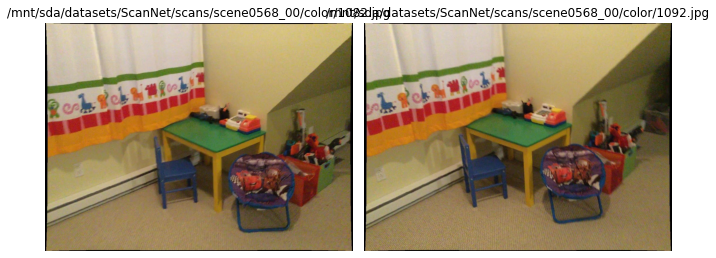

In [8]:
plot_figures({image1_name[0]: torch2cv(image1[0]), 
              image2_name[0]: torch2cv(image2[0])}, 1, 2, (9, 9))

## Standalone

In [9]:
from omegaconf import OmegaConf

from source.datasets.base.transforms import ImageDepthCalibFeaturesTFactory
from source.datasets.scannet.dataset import ScanNetDataset
from torch.utils.data.dataloader import DataLoader


s = """
    csv_path: "/mnt/sda/datasets/ScanNet/val.csv"
    data_options:
      - 'image'
      - 'calib'

    transforms:
      grayscale:
      
      resize:      
        width: -1
        height: -1
        
      crop1:
        type: 'divisor_crop'
"""

dataset_config = OmegaConf.create(s)

item_transforms = ImageDepthCalibFeaturesTFactory(dataset_config.transforms, 16).create()
dataset = ScanNetDataset.from_config(dataset_config, 'e_pyopengv/2k', item_transforms)
loader = DataLoader(dataset, 1)

_iter = loader.__iter__()

In [10]:
item = next(_iter)

image1_name = item[du.IMAGE_NAME1]

image1 = item[du.IMAGE1]

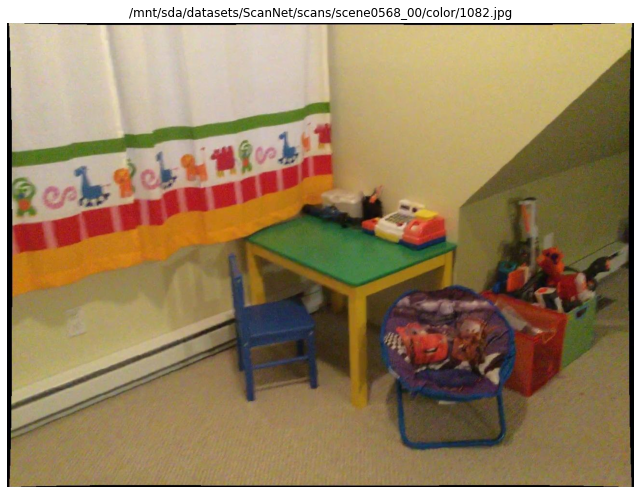

In [11]:
plot_figures({image1_name[0]: torch2cv(image1[0])}, 1, 1, (9, 9))